<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/keras_hyperparameter_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [91]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

tf.config.run_functions_eagerly(True)

# Generate Data:

### 1. Install the Kaggle library

In [92]:
!pip install kaggle --quiet

### 2. Configure your Kaggle API key

Download your `kaggle.json` file from your Kaggle account (Profile -> Account -> Create New API Token).

Then, upload this file to your Colab environment in the directory `~/.kaggle/` and set the correct permissions.

In [93]:
import os
from google.colab import files


# Upload kaggle.json
files.upload()


print("Kaggle API key configured successfully!")

Saving kaggle.json to kaggle.json
Kaggle API key configured successfully!


In [94]:
# Create .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the correct directory
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


### 3. Import `kagglehub` and download the dataset



In [95]:
import kagglehub
!kaggle datasets download -d mathchi/diabetes-data-set
!unzip diabetes-data-set.zip

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
diabetes-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  diabetes-data-set.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Curating the Data:

1.   Performing EDA on the data
2.   Dividingn data into dependant and Independant variable



In [96]:
df  = pd .read_csv('diabetes.csv')

In [97]:
print(df.head())
df.shape

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


(768, 9)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Performing Feature Scaling:

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Creating Training and Test sets:

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Create our Model:

In [102]:
Model = Sequential()
Model.add(Dense(32,input_dim=8,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.03)))
Model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
Model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
Model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [105]:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor="val_loss",
                   min_delta=0.00001,
                   patience=20,
                   verbose=1,
                   mode="auto",
                   baseline=None,
                   restore_best_weights=True,
                   )

In [106]:
history = Model.fit(X_train, y_train, epochs=1500, validation_data = (X_test,y_test),batch_size=32,verbose=1,callbacks=ES)

Epoch 1/1500


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6581 - loss: 3.9307 - val_accuracy: 0.6818 - val_loss: 3.1566
Epoch 2/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6638 - loss: 3.7127 - val_accuracy: 0.6753 - val_loss: 2.7666
Epoch 3/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6337 - loss: 3.0333 - val_accuracy: 0.7013 - val_loss: 2.3495
Epoch 4/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6642 - loss: 2.9574 - val_accuracy: 0.6818 - val_loss: 2.3988
Epoch 5/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6666 - loss: 2.5706 - val_accuracy: 0.7013 - val_loss: 2.3824
Epoch 6/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6624 - loss: 2.7475 - val_accuracy: 0.7078 - val_loss: 2.1578
Epoch 7/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7006 - loss: 2.4492 - val_accuracy: 0.6948 - val_loss: 2.1509
Epoch 8/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6924 - loss: 2.6776 - val_accuracy: 0.6948 

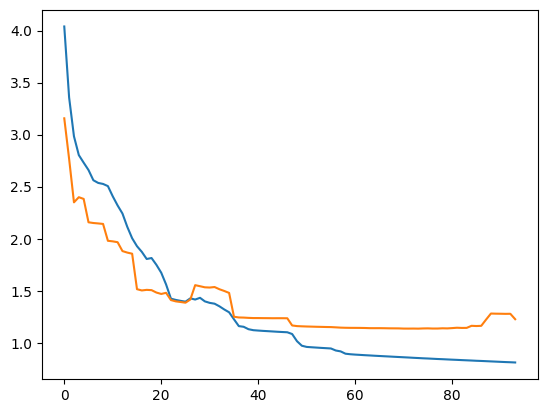

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

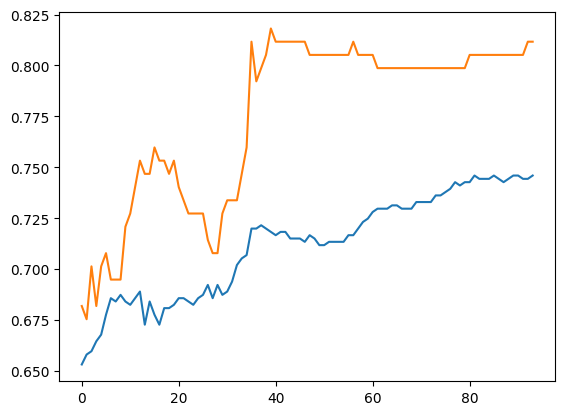

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# 1. How to select Appropriaate optimizer:

In [109]:
!pip install -U keras-tuner

In [110]:
import kerastuner as kt

In [111]:
 def build_model(hp):
  model  = Sequential()

  model.add(Dense(32,input_dim=8,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  # Create a function that helps us select the optimizer.
  optimizer = hp.Choice('optimizer',values = ['adam', 'sgd','rmsprop', 'adadelta'])
  model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [112]:
tuner = kt.RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='experiment_1',
    overwrite=True
)


In [114]:
tuner.search(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)

tuner.results_summary()


Trial 4 Complete [00h 00m 09s]
accuracy: 0.7719869613647461

Best accuracy So Far: 0.776872992515564
Total elapsed time: 00h 00m 44s
Results summary
Results in my_dir/experiment_1
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 00 summary
Hyperparameters:
optimizer: adam
Score: 0.776872992515564

Trial 03 summary
Hyperparameters:
optimizer: rmsprop
Score: 0.7719869613647461

Trial 01 summary
Hyperparameters:
optimizer: sgd
Score: 0.7133550643920898

Trial 02 summary
Hyperparameters:
optimizer: adadelta
Score: 0.6498371362686157


In [116]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [118]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [119]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
 3/20 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7934 - loss: 0.3787

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8054 - loss: 0.4004 - val_accuracy: 0.7597 - val_loss: 0.5489
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8049 - loss: 0.3916 - val_accuracy: 0.7597 - val_loss: 0.5493
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8130 - loss: 0.3892 - val_accuracy: 0.7532 - val_loss: 0.5487
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8124 - loss: 0.3878 - val_accuracy: 0.7532 - val_loss: 0.5483
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8210 - loss: 0.4012 - val_accuracy: 0.7532 - val_loss: 0.5464
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8064 - loss: 0.4035 - val_accuracy: 0.7532 - val_loss: 0.5459
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7984 - loss: 0.4008 - val_accuracy: 0.7597 - val_loss: 0.5438
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8147 - loss: 0.3938 - val_accuracy: 0.7468 - 

In [124]:
def build_model(hp):
  model = Sequential()
  units = hp.Int('units',min_value=8,max_value=128,step=8)
  model.add(Dense(units=units,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [125]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='experiment_1',
    overwrite=True
)


In [126]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Trial 10 Complete [00h 00m 10s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 01m 40s
